### 1. Get Train \& Test Data

In [1]:
import os 
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []
path7 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('epidural/brain_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraparenchymal/brain_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('intraventricular/brain_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('multi/brain_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('normal/brain_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('subarachnoid/brain_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('subdural/brain_window'):
    for filename in filenames:
        path7.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Number of type 0:  107
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  6080
Number of type 5:  16423
Number of type 6:  32200


In [2]:
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5], [6]])

OneHotEncoder()

In [3]:
import random


data = []
result = []

for path in path1:
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(0)
        
for path in path2:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(1) 
        
for path in path3:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(2)
        
for path in path4:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(3)

for path in path5:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(4)
        
for path in path6:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(5)

for path in path7:
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        data.append(np.array(img))
        result.append(6)

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.4)]
train_result = shuffled_result[0:int(length*0.4)]

test_data = shuffled_data[int(length*0.4):int(length*0.5)]
test_result = shuffled_result[int(length*0.4):int(length*0.5)] # FIXME: trying to reduce data so calling fit() doesn't take forever

In [4]:
test_data = np.array(test_data)
test_data.shape

test_result = np.array(test_result)
test_result.shape

(11243,)

In [5]:
train_data = np.array(train_data)
test_data.shape

train_result = np.array(train_result)
train_result.shape

(44970,)

In [6]:
# Confirm shape of data 
print("train data: ", train_data.shape)
print("test data: ", test_data.shape)
print("train data after reshape: ", train_data.reshape(-1,128*128).shape)
print("test data after reshape: ", test_data.reshape(-1,128*128).shape)

train data:  (44970, 128, 128)
test data:  (11243, 128, 128)
train data after reshape:  (44970, 16384)
test data after reshape:  (11243, 16384)


### 2. Build the Neural Network


In [7]:
X_valid, X_train = train_data[:5000] / 255., train_data[5000:] / 255.
y_valid, y_train = train_result[:5000], train_result[5000:]
X_test = test_data / 255.
y_test = test_result / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(39970, 128, 128) (5000, 128, 128) (11243, 128, 128)
(39970,) (5000,) (11243,)


In [8]:
print(y_train.reshape(39970,-1).reshape(39970, -1).shape)

(39970, 1)


In [9]:
y_train

array([3, 1, 1, ..., 6, 3, 3])

In [10]:
class_names = ["0", "1", "2", "3", "4", "5", "6"]

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

2024-04-16 16:56:18.364195: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 300)               4915500   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,946,610
Trainable params: 4,946,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
weights, biases = model.layers[1].get_weights()

weights

array([[ 0.00624145, -0.00223747, -0.00557982, ..., -0.00705057,
         0.00983666, -0.01756085],
       [ 0.0012146 , -0.00791551, -0.01495419, ...,  0.00153694,
        -0.00704478, -0.01061738],
       [-0.01577629, -0.01759288,  0.01810366, ..., -0.01080306,
         0.01815253, -0.01868817],
       ...,
       [ 0.00372475,  0.01591296, -0.00610253, ...,  0.00645785,
        -0.00081756,  0.00928183],
       [ 0.00682121, -0.0023047 , -0.00090442, ...,  0.01544421,
         0.01161724,  0.00345435],
       [-0.00477747, -0.00085977,  0.00936946, ...,  0.01443502,
        -0.0025459 , -0.0019555 ]], dtype=float32)

In [14]:
weights.shape

(16384, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 3. Training the Neural Network model

In [18]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 21s 58ms/step - loss: 1.6202 - accuracy: 0.3389 - val_loss: 1.6061 - val_accuracy: 0.3310
Epoch 2/30
313/313 [==============================] - 13s 43ms/step - loss: 1.5611 - accuracy: 0.3686 - val_loss: 1.5875 - val_accuracy: 0.3486
Epoch 3/30
313/313 [==============================] - 12s 40ms/step - loss: 1.5357 - accuracy: 0.3831 - val_loss: 1.6146 - val_accuracy: 0.3156
Epoch 4/30
313/313 [==============================] - 13s 40ms/step - loss: 1.5155 - accuracy: 0.3937 - val_loss: 1.5441 - val_accuracy: 0.3766
Epoch 5/30
313/313 [==============================] - 12s 38ms/step - loss: 1.4969 - accuracy: 0.4019 - val_loss: 1.5668 - val_accuracy: 0.3568
Epoch 6/30
313/313 [==============================] - 12s 38ms/step - loss: 1.4800 - accuracy: 0.4099 - val_loss: 1.5829 - val_accuracy: 0.3470
Epoch 7/30
313/313 [==============================] - 11s 35ms/step - loss: 1.4611 - accuracy: 0.4193 - val_loss: 1.5317 - val_accuracy:

In [19]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1250/1250 [==============================] - 29s 23ms/step - loss: 1.2538 - accuracy: 0.5169 - val_loss: 4.0824 - val_accuracy: 0.2152
Epoch 2/30
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1874 - accuracy: 0.5454 - val_loss: 7.2398 - val_accuracy: 0.0948
Epoch 3/30
1250/1250 [==============================] - 23s 18ms/step - loss: 1.1384 - accuracy: 0.5666 - val_loss: 5.4684 - val_accuracy: 0.0782
Epoch 4/30
1250/1250 [==============================] - 22s 18ms/step - loss: 1.0831 - accuracy: 0.5927 - val_loss: 2.1940 - val_accuracy: 0.3688
Epoch 5/30
1250/1250 [==============================] - 25s 20ms/step - loss: 1.0221 - accuracy: 0.6186 - val_loss: 2.9609 - val_accuracy: 0.1962
Epoch 6/30
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9830 - accuracy: 0.6310 - val_loss: 4.7976 - val_accuracy: 0.1500
Epoch 7/30
1250/1250 [==============================] - 23s 19ms/step - loss: 0.9484 - accuracy: 0.6482 - val_loss: 6.1684 -

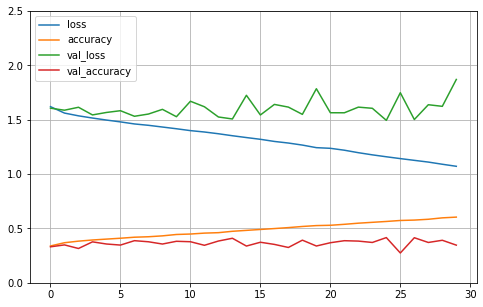

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

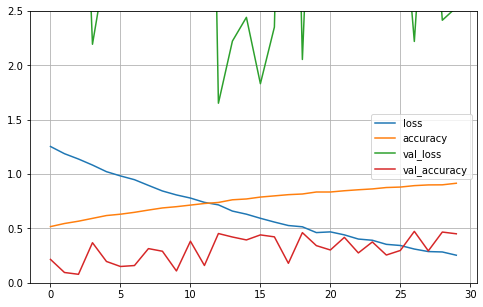

In [21]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
 
plt.show()

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.12, 0.28, 0.04, 0.  , 0.  , 0.56, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.93, 0.07, 0.  , 0.  , 0.  ],
       [0.01, 0.03, 0.13, 0.01, 0.  , 0.07, 0.75, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([6, 5, 6])

In [24]:
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

array([0.01176471, 0.00392157, 0.01960784])

In [25]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [26]:
#clear the section
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [28]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1250/1250 [==============================] - 33s 25ms/step - loss: nan - accuracy: 0.3105 - val_loss: nan - val_accuracy: 0.0012


Text(0, 0.5, 'Loss')

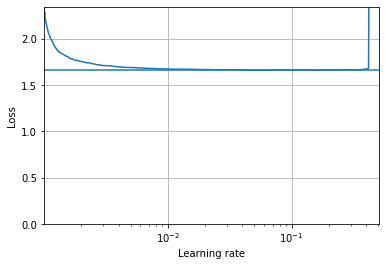

In [29]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

/Users/maxleroux/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1250/1250 [==============================] - 33s 25ms/step - loss: 2.3526 - accuracy: 0.2863 - val_loss: 1.6871 - val_accuracy: 0.2782
Epoch 2/100
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6390 - accuracy: 0.2940 - val_loss: 1.6847 - val_accuracy: 0.2932
Epoch 3/100
1250/1250 [==============================] - 23s 19ms/step - loss: 1.6113 - accuracy: 0.3038 - val_loss: 2.3204 - val_accuracy: 0.2214
Epoch 4/100
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6079 - accuracy: 0.3022 - val_loss: 1.6209 - val_accuracy: 0.3082
Epoch 5/100
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6040 - accuracy: 0.3041 - val_loss: 1.6180 - val_accuracy: 0.3106
Epoch 6/100
1250/1250 [==============================] - 23s 18ms/step - loss: 1.6020 - accuracy: 0.3063 - val_loss: 1.6209 - val_accuracy: 0.3088
Epoch 7/100
1250/1250 [==============================] - 23s 19ms/step - loss: 1.5892 - accuracy: 0.3272 - val_loss: 1

In [33]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1250/1250 [==============================] - 16s 12ms/step - loss: 1.5423 - accuracy: 0.3632


[1.5422872304916382, 0.3632224202156067]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1250/1250 [==============================] - 25s 19ms/step - loss: 4.1831 - val_loss: 3.2304
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 3.2084 - val_loss: 3.2183
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 3.1992 - val_loss: 3.1996
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 3.1957 - val_loss: 3.1929
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 3.1925 - val_loss: 3.1844
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 3.1902 - val_loss: 3.2033
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 3.1892 - val_loss: 3.1915
Epoch 8/20
1250/1250 [==============================] - 9s 7ms/step - loss: 3.1872 - val_loss: 3.1787
Epoch 9/20
1250/1250 [==============================] - 9s 7ms/step - loss: 3.1858 - val_loss: 3.1794
Epoch 10/20
1250/1250 [==============================] - 9s 7ms/step - loss: 

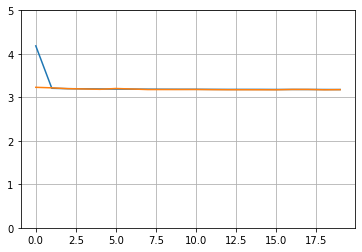

In [35]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()